In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import cmocean
import cftime
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
coast = cfeature.GSHHSFeature(scale="f")
plt.rcParams.update({'font.size': 18})

In [13]:
datadir1 = "/media/ctroupin/My Passport/data/Wind/ECMWF/"
figdir = "/media/ctroupin/My Passport/data/Wind/ECMWF/figures3"
datafile1 = os.path.join(datadir1, "adaptor.mars.internal-1646646127.6055307-18917-11-91320d8b-4852-4eb1-8a57-c47d5041f429.nc")

In [14]:
with netCDF4.Dataset(datafile1) as nc:
    lon = nc.variables["longitude"][:]
    lat = nc.variables["latitude"][:]
    u10 = nc.variables["u10"][:]
    v10 = nc.variables["v10"][:]
    time = nc.variables["time"]
    dates = netCDF4.num2date(time[:], time.units)
    speed = np.sqrt(u10 * u10 + v10 * v10)

In [26]:
dates

masked_array(data=[cftime.DatetimeGregorian(2019, 8, 1, 0, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 1, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 2, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 3, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 4, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 5, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 6, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 7, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 8, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 9, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 10, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 11, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 12, 0, 0, 0),
                   cftime.DatetimeGregorian(2019, 8, 1, 13, 0, 0, 0),
                   cftime.Date

In [15]:
domain = [lon.min(), lon.max(), lat.min(), lat.max()]
domain = [0., 12., 40., 45.]
llon, llat = np.meshgrid(lon, lat)

In [16]:
theproj = ccrs.Mercator(central_longitude=0.5 * (domain[0] + domain[1]), 
                        min_latitude=domain[2], max_latitude=domain[3], 
                        latitude_true_scale=0.5 * (domain[2] + domain[3]))
datacrs = ccrs.PlateCarree()

KeyboardInterrupt: 

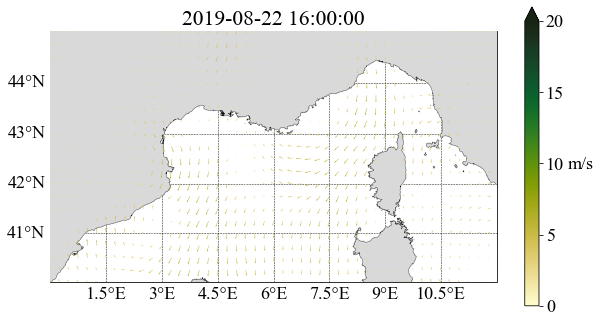

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=theproj)
ax.set_extent(domain)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', alpha=0.95, linestyle='--', zorder=2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.add_feature(coast, color=".85", zorder=5)
ax.add_feature(coast, linewidth=.25, zorder=6)

#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#           layers=['emodnet:mean_atlas_land', 'coastlines'])

thetitle = ax.set_title(dates[0])
#quiv = ax.quiver(llon, llat, u10[0,:,:], v10[0,:,:],
#              scale=200, width=0.001, transform=datacrs, zorder=4)

quiv = ax.quiver(llon, llat, u10[0,:,:], v10[0,:,:], speed[0,:,:], 
                 cmap=cmocean.cm.speed, scale=400, width=.001,
                transform=ccrs.PlateCarree(), clim=[0, 20], zorder=7)

cb = plt.colorbar(quiv, extend="max", shrink=.55)

cb.set_label("m/s", rotation=0, ha="left")
cb.set_ticks([0, 5, 10, 15, 20])

for iii in range(0, len(dates)):  
    
    quiv.remove()
    # thetitle.remove()
    
    thetitle = ax.set_title(dates[iii])
    
    dstring = dates[iii].strftime("%Y%m%dT%H%M%S")
    figname = os.path.join(figdir, f"wind_ecmwf_{dstring}.jpg")
    

    quiv = ax.quiver(llon, llat, u10[iii,:,:], v10[iii,:,:], speed[iii,:,:], 
                     cmap=cmocean.cm.speed, scale=400, width=.001,
                transform=ccrs.PlateCarree(), clim=[0, 20], zorder=7)

    # ax.coastlines(color="k", linewidth=.5, zorder=5)
    plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()

### Single date

In [6]:
gooddate = np.where(dates == cftime.DatetimeGregorian(2019, 8, 16, 12, 0, 0, 0))[0][0]
gooddate

372

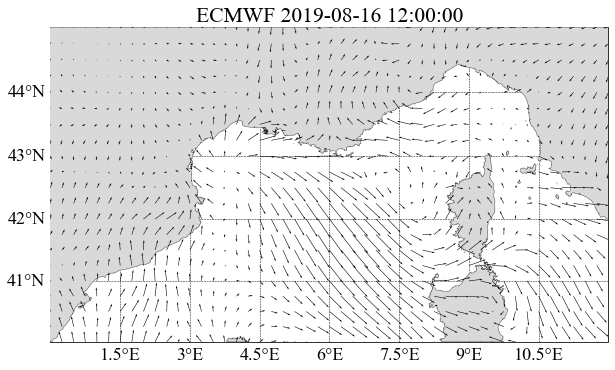

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=theproj)
ax.set_extent(domain)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', alpha=0.95, linestyle='--', zorder=2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax1.add_feature(coast, color=".85", zorder=5)
ax1.add_feature(coast, linewidth=.25, zorder=6)

#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#           layers=['emodnet:mean_atlas_land', 'coastlines'])

thetitle = ax.set_title(f"ECMWF {dates[gooddate]}")
quiv = ax.quiver(llon, llat, u10[gooddate,:,:], v10[gooddate,:,:],
              scale=200, width=0.001, transform=datacrs, zorder=7)

dstring = dates[gooddate].strftime("%Y%m%dT%H%M%S")
figname = os.path.join(figdir, f"wind_ecmwf_emodnet_{dstring}.jpg")

plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.show()
plt.close()